# Data Science Intern @Lets Grow More

**Author: Nikita Kumbhar.**

Task 2 : Stock Market Prediction And Forcasting Using Stacked LSTM 


    | Dataset link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing library:

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
from keras.layers import LSTM
from keras.models import Sequential
#from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler

# Data Reading

In [4]:
stock=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [5]:
#It show first 5 records.
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
#It show last 5 records.
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
stock.shape

(2035, 8)

**In this dataset 2035 rows and 8 columns.**

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
stock.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

**In this dataset zero(0) missing values are present.**

In [10]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


**This is the descriptive statistics of the stock dataset. we see minimum price turnover(Lacs) is 37.040000 and maximum is 55755.08000**

In [11]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

**These are the different columns present in dataset.**

In [12]:
#heking correlation:
stock.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


**We see this data is highly positive correlated with each other.**

In [13]:
stock["Date"].min(), stock["Date"].max()

('2010-07-21', '2018-09-28')

In [14]:
stock.set_index("Date",inplace=True)
stock.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# EDA

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

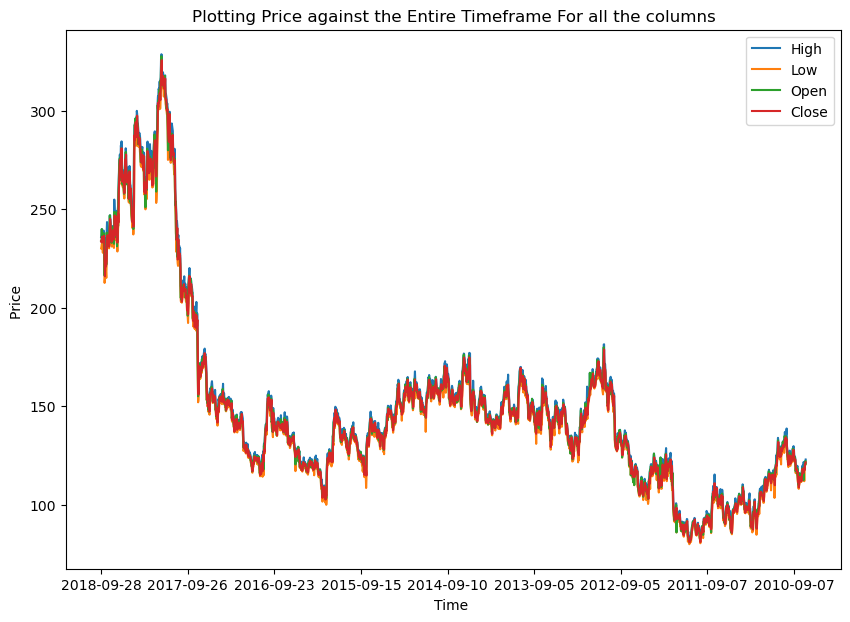

In [15]:
stock[["High", "Low", "Open", "Close"]].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time ")
plt.ylabel("Price ")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

**We see in the above plot, high,low,open, close price plot are same.so we can take any one for next prediction.**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For HIGH column')

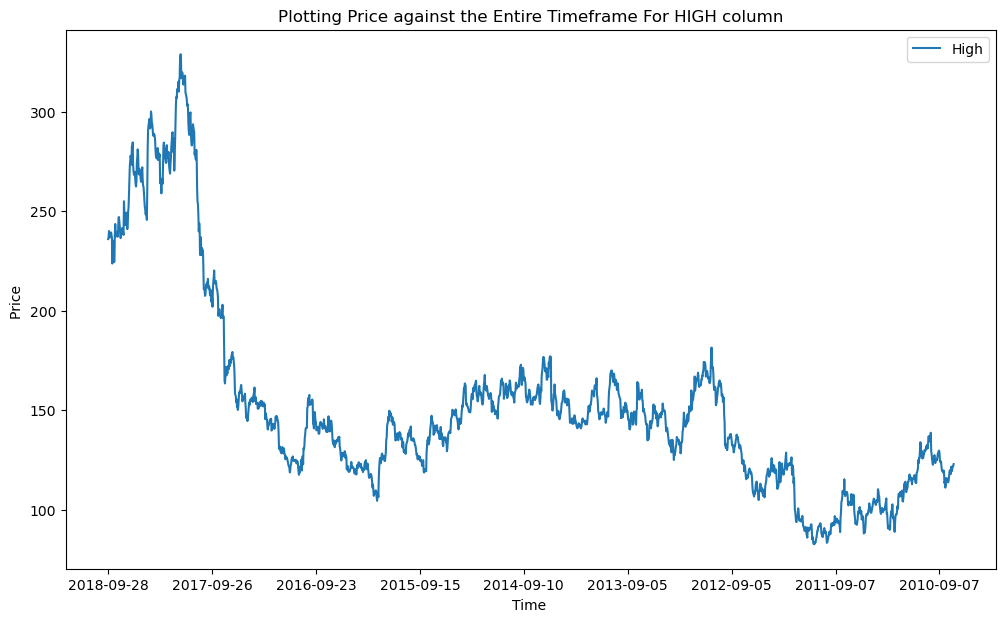

In [16]:
plt.figure(figsize=(12,7))
stock["High"].plot()
plt.legend(loc="best")
plt.xlabel("Time ")
plt.ylabel("Price ")
plt.title("Plotting Price against the Entire Timeframe For HIGH column")

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For LOW column')

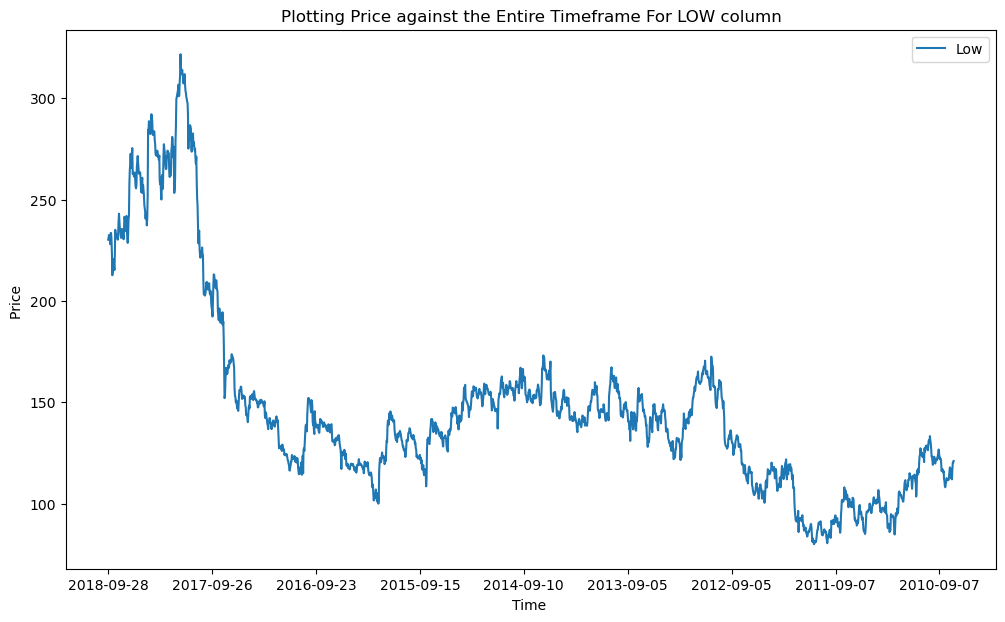

In [17]:
plt.figure(figsize=(12,7))
stock["Low"].plot()
plt.legend(loc="best")
plt.xlabel("Time ")
plt.ylabel("Price ")
plt.title("Plotting Price against the Entire Timeframe For LOW column")

In [18]:
new_df = pd.DataFrame(stock["High"].copy(), columns=["High"])
new_df.head()

,High
Date,
2018-09-28,235.95
2018-09-27,236.80
2018-09-26,240.00
2018-09-25,236.75
2018-09-24,239.20


In [19]:
train_size = int(len(new_df)*0.8)

train = new_df.iloc[0:train_size]
test = new_df.iloc[train_size:len(new_df)]

In [20]:
len(train), len(test)

(1628, 407)

In [21]:
def create_dataset(X, y, lag=1):
    xs,ys = [], []
    
    for i in range(len(X) - lag):
        tmp = X.iloc[i: i+lag].values
        xs.append(tmp)
        ys.append(y.iloc[i+lag])
    
    return np.array(xs), np.array(ys)
    

In [22]:
xtrain, ytrain = create_dataset(train, train["High"],10)
xtest, ytest = create_dataset(test, test["High"],10)

# Using an LSTM Model

# Long Short-Term Memory (LSTM) : 
LSTMs are predominantly used to learn, process, and classify sequential data because these networks can learn long-term dependencies between time steps of data.
It is used for processing, predicting, and classifying on the basis of time-series data. Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is specifically designed to handle sequential data, such as time series, speech, and text.


**Why is LSTM used for forecasting?**
“The LSTM cell adds long-term memory in an even more performant way because it allows even more parameters to be learned. This makes it the most powerful [Recurrent Neural Network] to do forecasting, especially when you have a longer-term trend in your data.

In [29]:
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(xtrain.shape[1], xtrain.shape[2])))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [30]:
model.fit(xtrain, ytrain,
         epochs=10,
         batch_size=10,
         verbose=1,
         shuffle=False
         )

Epoch 1/10
162/162 [==============================] - 4s 8ms/step - loss: 2551.7007
Epoch 2/10
162/162 [==============================] - 1s 7ms/step - loss: 46.6413
Epoch 3/10
162/162 [==============================] - 1s 7ms/step - loss: 53.4535
Epoch 4/10
162/162 [==============================] - 1s 7ms/step - loss: 47.1880
Epoch 5/10
162/162 [==============================] - 1s 7ms/step - loss: 25.8507
Epoch 6/10
162/162 [==============================] - 1s 8ms/step - loss: 26.4357
Epoch 7/10
162/162 [==============================] - 1s 9ms/step - loss: 37.9617
Epoch 8/10
162/162 [==============================] - 1s 9ms/step - loss: 32.0416
Epoch 9/10
162/162 [==============================] - 1s 9ms/step - loss: 26.3794
Epoch 10/10
162/162 [==============================] - 1s 9ms/step - loss: 22.8403


In [31]:
ypred = model.predict(xtest)

13/13 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Entire Timeframe')

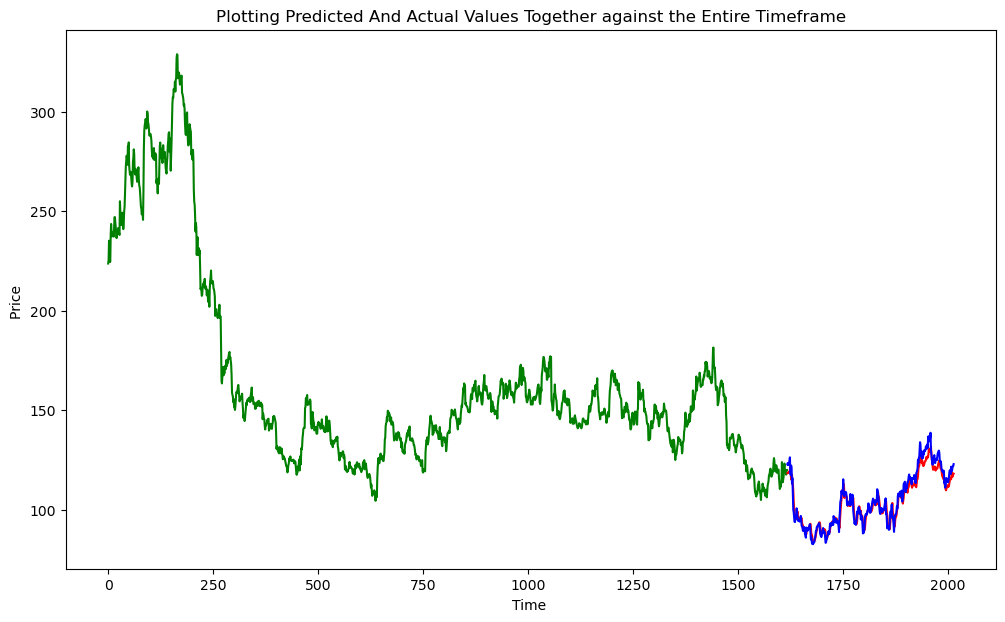

In [32]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(0, len(xtrain)), ytrain, 'g', label="history")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ypred, 'r', label="predictions")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ytest, 'b', label="Actual")
plt.xlabel("Time ")
plt.ylabel("Price ")
plt.title("Plotting Predicted And Actual Values Together against the Entire Timeframe")

**We see in the above plot Time increases then Price decreases.**

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred,squared=False)

3.2984161600377186

**Mean squared error is 3.2984.**

Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Testing Timeframe')

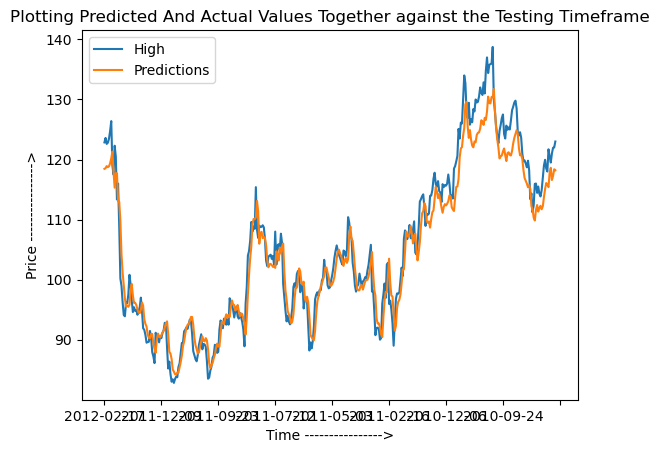

In [34]:
test = new_df.iloc[train_size+10:].copy()

test["Predictions"] = ypred
test[["High", "Predictions"]].plot()
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Testing Timeframe")

# Thank You!